<a href="https://colab.research.google.com/github/Sylvester107/Few-Shot-Learning-for-Effective-Categorization-and-Recommendation-of-Low-Frequency-Products/blob/main/Paper_1304_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first step in the implementation process is to extract sessions and data from one or two locales and convert to a new CSV file. This is to reduce the resource constraint limitation

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
drive_path = '/content/drive/MyDrive/Few shot learning for categorization and recommendation/'

In [ ]:
#Get the data into the workspace
Products_train =pd.read_csv('/content/drive/MyDrive/Few shot learning for categorization and recommendation/products_train.csv')

Sessions_train =pd.read_csv('/content/drive/MyDrive/Few shot learning for categorization and recommendation/sessions_train.csv')

In [ ]:
#check a sample of the product data
Products_train.head()

,id,locale,title,price,brand,color,size,model,material,author,desc
0,B005ZSSN10,DE,RED DRAGON Amberjack 3 - Steel Tip 22 Gramm Wo...,30.95,RED DRAGON,NaN,NaN,RDD0089,NaN,NaN,Amberjacks Steel Dartpfeile sind verfügbar in ...
1,B08PRYN6LD,DE,Simply Keto Lower Carb* Schokodrops ohne Zucke...,17.90,Simply Keto,NaN,750 g (1er Pack),NaN,NaN,NaN,🌱 NATÜRLICHE SÜSSE DURCH ERYTHRIT - Wir stelle...
2,B09MBZJ48V,DE,"Sennheiser 508377 PC 5.2 Chat, Stilvolles Mult...",68.89,Sennheiser,Multi-Colour,One size,508377,Kunstleder,NaN,3.5 MM BUCHSE - Kann problemlos an Geräte mit ...
3,B08ZN6F26S,DE,AmyBenton Auto ab 1 2 3 ahre - Baby Aufziehbar...,18.99,Amy & Benton,Animal Car,NaN,2008B,aufziehauto 1 jahr,NaN,【Auto aufziehbar】: Drücken Sie einfach leicht ...
4,B094DGRV7D,DE,PLAYMOBIL - 70522 - Cavaliere mit grauem Pony,7.17,PLAYMOBIL,Nicht Zutreffend.,OneSize,70522,Polypropylen,NaN,Inhalt: 1 Stück


In [ ]:
Products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551057 entries, 0 to 1551056
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   id        1551057 non-null  object 
 1   locale    1551057 non-null  object 
 2   title     1551049 non-null  object 
 3   price     1551057 non-null  float64
 4   brand     1531686 non-null  object 
 5   color     1125428 non-null  object 
 6   size      917091 non-null   object 
 7   model     761135 non-null   object 
 8   material  834382 non-null   object 
 9   author    73509 non-null    object 
 10  desc      1424083 non-null  object 
dtypes: float64(1), object(10)
memory usage: 130.2+ MB


In [ ]:
Products_train['locale'].value_counts()

,count
locale,
DE,518327
UK,500180
JP,395009
IT,50461
FR,44577
ES,42503


Extract products from UK

In [ ]:
pd_UK = Products_train[Products_train['locale']=='UK']
pd_UK.head()
#convert pd_uk to csv
path_to_csv = '/content/drive/MyDrive/Few shot learning for categorization and recommendation/pd_UK.csv'
pd_UK.to_csv(path_to_csv, index=False)

extract only products from

In [ ]:
# check a sample of the session data
Sessions_train.head()

,prev_items,next_item,locale
0,['B09W9FND7K' 'B09JSPLN1M'],B09M7GY217,DE
1,['B076THCGSG' 'B007MO8IME' 'B08MF65MLV' 'B001B...,B001B4THSA,DE
2,['B0B1LGXWDS' 'B00AZYORS2' 'B0B1LGXWDS' 'B00AZ...,B0767DTG2Q,DE
3,['B09XMTWDVT' 'B0B4MZZ8MB' 'B0B7HZ2GWX' 'B09XM...,B0B4R9NN4B,DE
4,['B09Y5CSL3T' 'B09Y5DPTXN' 'B09FKD61R8'],B0BGVBKWGZ,DE


In [ ]:
session_uk = Sessions_train[Sessions_train['locale']=='UK']
session_uk.head()
session_uk.to_csv('/content/drive/MyDrive/Few shot learning for categorization and recommendation/session_uk.csv', index=False)

Part 2  Reset runtime and bring in the new datasets


In [ ]:
import pandas as pd
from collections import Counter

In [ ]:
#Get the data into the workspace
Products_train =pd.read_csv('/content/drive/MyDrive/Few shot learning for categorization and recommendation/pd_UK.csv')

Sessions_train =pd.read_csv('/content/drive/MyDrive/Few shot learning for categorization and recommendation/session_uk.csv')

we will count the products and based on the sessions

In [ ]:
Sessions_train.head()

,prev_items,next_item,locale
0,['B0BFDL54Y7' 'B0BFDR9X13' 'B07J4WF8VH' 'B07Y2...,B07Y227WNJ,UK
1,['B07FM2GLNQ' 'B07GZW3P4W'],B095NNZCR6,UK
2,['B0021L95HU' 'B07DDL77RY' 'B07DDL77RY'],B002KA1FZC,UK
3,['B0B2WSZYL2' 'B000I8XZ7O'],B000I90TAO,UK
4,['B00LW1APOC' 'B00LW1APOC' 'B00OI6NQUI' 'B09HL...,B07H54NZ3K,UK


In [ ]:
#next item is the item they interacted with, this is our test set
#Question what if next item never appears in the prev items

# create an all items column with both next item and prev item
# then count the items in all items using a hashmap
# convert the hasmap into a a new dataframe with product and count column
# create a lambda function to assign labels based on a threshold to these products
# save to a new csv

#lookup each products attribute and append to the new df with the labels, the attributes
#save to csv, this new data will be used for training a supervised learning model



### create an all items column with both next item and prev item

In [ ]:

# a function to turn prev_item into a list of products

def parse_list_string(s):
    # Remove brackets and split by space
    cleaned = s.strip('[]').strip()
    # Split by space and remove any quotes
    items = [item.strip("'").strip('"') for item in cleaned.split()]
    return items

#apply this function to the prev_item in the session column
Sessions_train['prev_items'] = Sessions_train['prev_items'].apply(parse_list_string)


In [ ]:
Sessions_train.head()

,prev_items,next_item,locale
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ,UK
1,"[B07FM2GLNQ, B07GZW3P4W]",B095NNZCR6,UK
2,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC,UK
3,"[B0B2WSZYL2, B000I8XZ7O]",B000I90TAO,UK
4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,UK


In [ ]:
# since the prev_items is a list: create a new column, all_items and append items in next_item using a lambda function
Sessions_train['all_items'] = Sessions_train.apply(lambda x: x['prev_items'] + [x['next_item']], axis=1)

Sessions_train.head()

,prev_items,next_item,locale,all_items
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ,UK,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJ..."
1,"[B07FM2GLNQ, B07GZW3P4W]",B095NNZCR6,UK,"[B07FM2GLNQ, B07GZW3P4W, B095NNZCR6]"
2,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC,UK,"[B0021L95HU, B07DDL77RY, B07DDL77RY, B002KA1FZC]"
3,"[B0B2WSZYL2, B000I8XZ7O]",B000I90TAO,UK,"[B0B2WSZYL2, B000I8XZ7O, B000I90TAO]"
4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,UK,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W..."


In [ ]:
Sessions_train.iloc[0]['all_items']

['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B07Y21LDJX', 'B07Y227WNJ']

In [ ]:
from collections import Counter

# Flatten all_items into a single list
all_items = [item for sublist in Sessions_train['all_items'] for item in sublist]

# Count the items in all_items using a Counter
counter = Counter(all_items)


In [ ]:
counter

Counter({'B0BFDL54Y7': 12,
         'B0BFDR9X13': 15,
         'B07J4WF8VH': 11,
         'B07Y21LDJX': 38,
         'B07Y227WNJ': 32,
         'B07FM2GLNQ': 64,
         'B07GZW3P4W': 52,
         'B095NNZCR6': 9,
         'B0021L95HU': 8,
         'B07DDL77RY': 15,
         'B002KA1FZC': 18,
         'B0B2WSZYL2': 8,
         'B000I8XZ7O': 33,
         'B000I90TAO': 30,
         'B00LW1APOC': 334,
         'B00OI6NQUI': 107,
         'B09HLDN8W1': 127,
         'B07H54NZ3K': 10,
         'B079DXT1JM': 8,
         'B079DZRVDF': 8,
         'B079FD3MGB': 3,
         'B09PKCR4CX': 14,
         'B09X37JZ54': 181,
         'B0B9GH9597': 74,
         'B0B9GHMSXS': 10,
         'B074PQTR4W': 28,
         'B01K1SETD4': 23,
         'B094VLF9QV': 669,
         'B07ZBKD187': 73,
         'B07DH9HH1G': 56,
         'B0954WV7VV': 71,
         'B09VN6XSDW': 159,
         'B0B2R1KL5G': 35,
         'B0B2QV95QX': 11,
         'B0845XT59N': 148,
         'B00474K8SY': 92,
         'B008BZVCVM': 78,


In [ ]:
# convert the new products and their counts into a dataframe columns = ['product','interaction_count']
df_counter = pd.DataFrame(list(counter.items()), columns=['product', 'interaction_count'])
df_counter.head()





,product,interaction_count
0,B0BFDL54Y7,12
1,B0BFDR9X13,15
2,B07J4WF8VH,11
3,B07Y21LDJX,38
4,B07Y227WNJ,32


for each product we have how many people interacted with it
let's look at the distribution

In [ ]:
df_counter['interaction_count'].describe()

,interaction_count
count,494409.000000
mean,12.246312
std,26.238122
min,1.000000
25%,3.000000
50%,5.000000
75%,11.000000
max,1903.000000


let's look at some ideas, the standard deviation is 26 whilst the mean is 12, this is because the range of frequency is very high, i.e min 1 max 1903 correct? so setting a threshold this way with the assumption that the frequency is normally distribute is not right correct

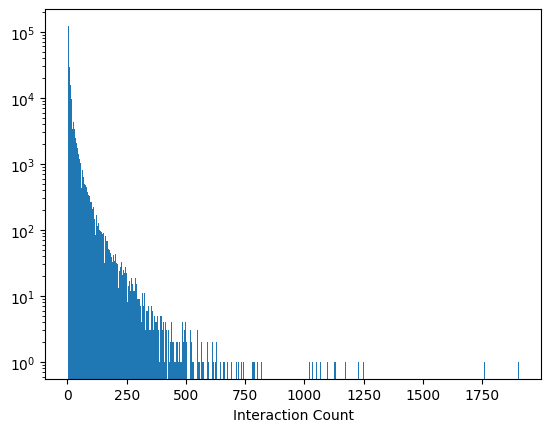

In [ ]:
# plot a histogram to visualize the df_counter product distribution
import matplotlib.pyplot as plt
plt.hist(df_counter['interaction_count'], bins=1000,log=True)
plt.xlabel('Interaction Count')
plt.show()


popular products has very high interactions, which can affect how we set the threshold
I will drop the outliers and look at the distribution again

In [ ]:
df_interactions_without_outliers = df_counter[df_counter['interaction_count'] < 1000]
df_interactions_without_outliers.head()

,product,interaction_count
0,B0BFDL54Y7,12
1,B0BFDR9X13,15
2,B07J4WF8VH,11
3,B07Y21LDJX,38
4,B07Y227WNJ,32


In [ ]:
df_interactions_without_outliers['interaction_count'].describe()

,interaction_count
count,494395.000000
mean,12.211920
std,25.391422
min,1.000000
25%,3.000000
50%,5.000000
75%,11.000000
max,898.000000


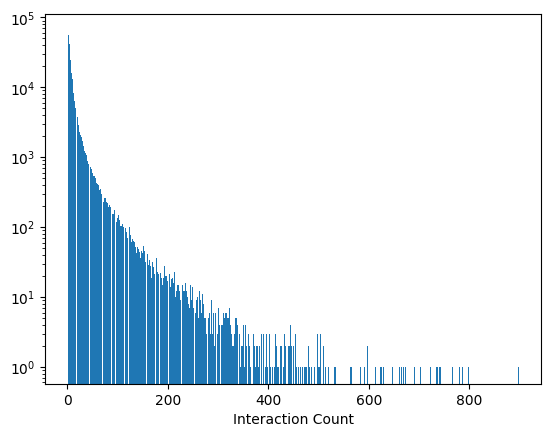

In [ ]:
plt.hist(df_interactions_without_outliers['interaction_count'], bins=1000,log=True)
plt.xlabel('Interaction Count')
#plt.xscale('log')
plt.show()

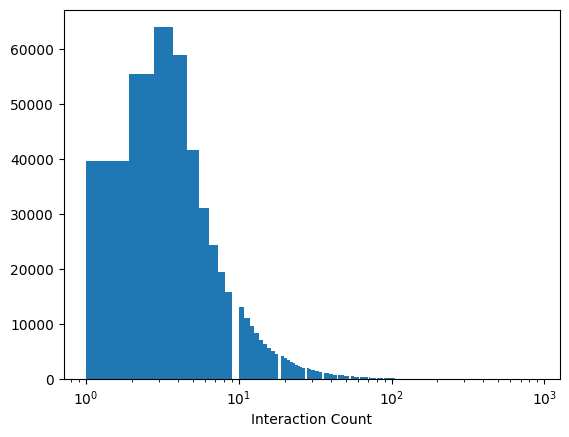

In [ ]:
plt.hist(df_interactions_without_outliers['interaction_count'], bins=1000)
plt.xlabel('Interaction Count')
plt.xscale('log')
plt.show()

from the plots and the statistics, mean is 12, std is 25 but the 75th percentile is 11 and the 25th percentile is 3
I'm arriving at the decision that, products above the mean are high frequency products and products below the mean are low frequency products

and it turns a lot of the products are below the mean, making popular products and probably popular users dominate the recommender systems

that's why we should think of recommending the right products based solely on the individual

In [ ]:
df_counter['label'] = df_counter['interaction_count'].apply(lambda x: 0 if x > 12 else 1) #where zero represents popular and 1 represent unpopular(low-frequncy )
df_counter.head()

,product,interaction_count,label
0,B0BFDL54Y7,12,1
1,B0BFDR9X13,15,0
2,B07J4WF8VH,11,1
3,B07Y21LDJX,38,0
4,B07Y227WNJ,32,0


look up each product's attribute and attach them to df_counter as new columns
save to csv  

In [ ]:
#load products_uk
Products_train =pd.read_csv('/content/drive/MyDrive/Few shot learning for categorization and recommendation/pd_UK.csv')

In [ ]:
Products_train.head()

,id,locale,title,price,brand,color,size,model,material,author,desc
0,B087LZNPHS,UK,"SOCHOW Sherpa Fleece Throw Blanket, Double-Sid...",24.99,SOCHOW,Teal Green,127cm×150cm,NaN,100% Polyester,NaN,COLOR: The sherpa throw blanket is available i...
1,B08THFN1KX,UK,Hippowarehouse Personalised Photo Printed Mous...,9.95,Hippowarehouse,White,240mm x 190mm x 60mm,50245-Mat-Perso,Rubber,NaN,Competitively priced
2,0804185328,UK,"500 Easy Recipes for Every Machine, Both Stove...",16.49,Clarkson Potter,White,NaN,NaN,NaN,"Scarbrough, Mark",NaN
3,B09VBKDBW6,UK,"TYHJOY Mini Bag Sealer, Handheld Vacuum Heat S...",11.99,TYHJOY,Black,NaN,FBA-sealer-black,Acrylonitrile Butadiene Styrene,NaN,【AFTER-SALE】This handheld food heat sealer sho...
4,B096ZW8B49,UK,Lucosobie Steering Wheel Lock - Car Anti-Theft...,26.99,Lucosobie,Black,NaN,NaN,Alloy Steel,NaN,🔐【 Anti-Friction & Customer First】Each box of ...


1. drop the locale column as we know that all products are from the uk
2. for each product id in df_counter find the corresponding product in product_train and merge on product id

In [ ]:
# drop the locale column
Products_train.drop(columns=['locale'], inplace=True)

# merge on id
training_data = pd.merge(df_counter, Products_train, left_on='product', right_on='id')
training_data.head()

,product,interaction_count,label,id,title,price,brand,color,size,model,material,author,desc
0,B0BFDL54Y7,12,1,B0BFDL54Y7,Wokii Vegetable Chopper Vegetable Slicer 14 in...,15.99,Wokii,Blue,33x12x12cm/12.87*4.68*4.68inches,NaN,Acrylonitrile Butadi,NaN,"【Easy To Clean】The blade is easy to remove, ea..."
1,B0BFDR9X13,15,0,B0BFDR9X13,Wokii Vegetable Chopper Vegetable Slicer 14 in...,14.99,Wokii,Grey+green,33x12x12cm/12.87*4.68*4.68inches,NaN,Acrylonitrile Butadi,NaN,"【Easy To Clean】The blade is easy to remove, ea..."
2,B07J4WF8VH,11,1,B07J4WF8VH,Vinsani® Kitchen Vegetable Cutter Onion Garlic...,16.99,Vinsani,White,NaN,NaN,Stainless Steel,NaN,CAUTION: If the vegetable or fruit has a tough...
3,B07Y21LDJX,38,0,B07Y21LDJX,"ADOV Vegetable Chopper, 14 in 1 Multi-Function...",21.99,ADOV,Blue,NaN,NaN,"Premium ABS Plastic, Stainless Steel",NaN,【EASY CLEANING】 ADOV vegetable slicer can be c...
4,B07Y227WNJ,32,0,B07Y227WNJ,"ADOV Vegetable Chopper, 14 in 1 Multi-Function...",21.99,ADOV,Grey,NaN,NaN,"Premium ABS Plastic, Stainless Steel",NaN,【EASY CLEANING】 ADOV vegetable slicer can be c...


from here we could see that the product and id do match so we can drop one of them and save our training data to csv and prepare it for the first supervised model

Also it's obviouse that the interaction count greatly determines the label drop it too

In [ ]:
training_data.drop(columns=['id','interaction_count'], inplace=True)
training_data.to_csv('/content/drive/MyDrive/Few shot learning for categorization and recommendation/training_data_uk_only_labeled.csv', index=False)